In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns 
import re


In [2]:
pd.set_option('display.max_colwidth', 150)

In [3]:
dataset = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [4]:
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


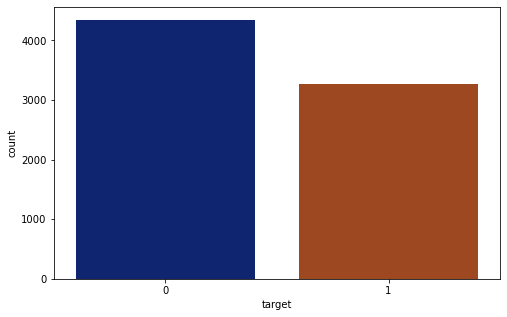

In [5]:

plt.figure(figsize=(8,5))
sns.countplot(x="target", data=dataset , palette="dark", linewidth=5)
plt.show()

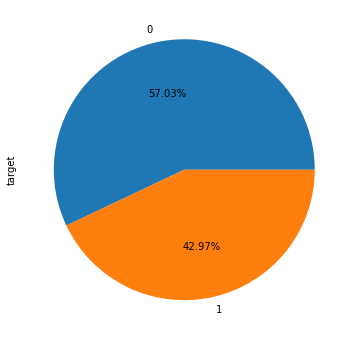

In [6]:
piedata = dataset['target']
plt.figure(figsize=(6,6))
piedata.value_counts().plot(kind = 'pie',autopct = '%.2f%%')

Text(0.5, 1.0, 'Count of Keywords')

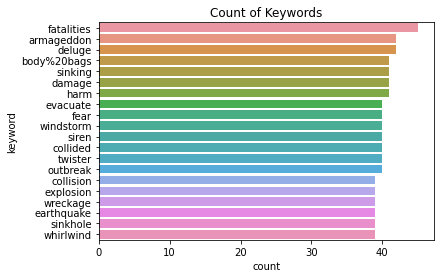

In [7]:
sns.countplot(y = dataset.keyword,order = dataset['keyword'].value_counts().sort_values(ascending=False).iloc[0:20].index)
plt.title("Count of Keywords")


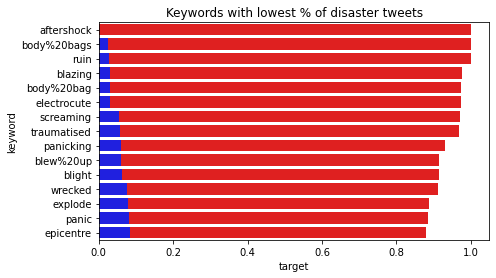

In [8]:
disastered_tweet = dataset.groupby('keyword')['target'].mean().sort_values(ascending=False).head(15)
non_disasterd_tweet  = dataset.groupby('keyword')['target'].mean().sort_values().head(15)

plt.figure(figsize=(7,4))
sns.barplot(disastered_tweet, disastered_tweet.index, color='red')
plt.title('Keywords with highest % of disaster tweets')
sns.barplot(non_disasterd_tweet, non_disasterd_tweet.index, color='blue')
plt.title('Keywords with lowest % of disaster tweets')

plt.show()

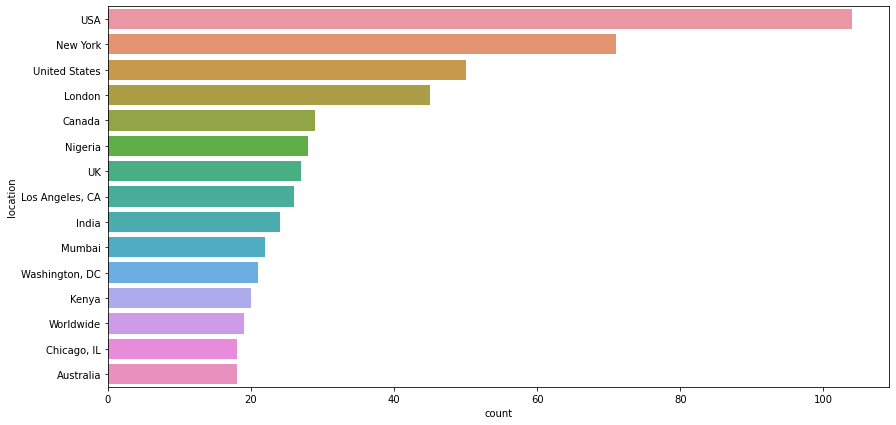

In [9]:
plt.figure(figsize=(14,7))
sns.countplot(y = dataset.location, order = dataset['location'].value_counts().sort_values(ascending=False).iloc[0:15].index)

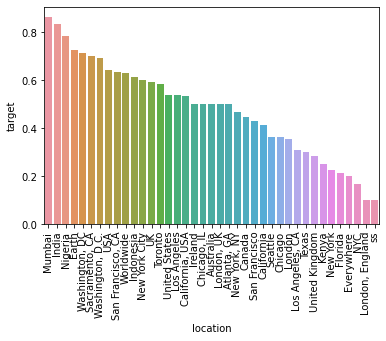

In [10]:
raw_loc = dataset.location.value_counts()
top_loc_disaster = list(raw_loc[raw_loc>=10].index)
top_only_disaster = dataset[dataset.location.isin(top_loc_disaster)]

top_location = top_only_disaster.groupby('location')['target'].mean().sort_values(ascending=False)
sns.barplot(x=top_location.index, y=top_location)
plt.xticks(rotation=90)
plt.show()

In [11]:
dataset.keyword.fillna('None', inplace=True) 
dataset.location.fillna('None' , inplace = True )

In [12]:
dataset.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [219]:
def decontraction(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase =phrase.lower()
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub('\[.*?\]', ' ', phrase) 
    phrase = re.sub('https?://\S+|www\.\S+', ' ', phrase)
    phrase = re.sub('<.*?>+', ' ', phrase)
    phrase = re.sub('\n', ' ', phrase)
    phrase = re.sub('\w*\d\w*', ' ', phrase)
    return phrase

dataset.text = [decontraction(tweet) for tweet in dataset.text]

In [220]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [221]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [222]:
corpus = []
for i in range(len(dataset.text)):
    review = re.sub('[^a-zA-Z]' ,' ', dataset['text'][i])
    review =review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review  if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask ishelt place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave far', 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school bu multi car crash break', 'man', 'love fruit', 'summer love', 'car fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder day', 'looooool', 'way not eat shit', 'nyc last week', 'love girlfriend', 'cooool', 'like pasta', 'end', 'bbcmtd wholesal mark

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = TfidfVectorizer()
av = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [224]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [225]:
len(X[0])

12619

In [226]:
Y = dataset.iloc[:,-1].values


In [227]:
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y , test_size = 0.2, random_state = 42)

In [229]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((6090, 12619), (1523, 12619), (6090,), (1523,))

In [230]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [231]:
Y_pred =classifier.predict(X_test)

0.7964543663821405

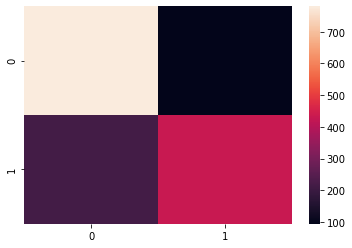

In [232]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(Y_test , Y_pred)
sns.heatmap(cm)
accuracy_score(Y_test , Y_pred)

0.8924466338259441

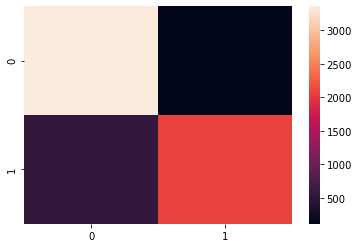

In [233]:
Y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(Y_train , Y_pred_train)
sns.heatmap(cm)
accuracy_score(Y_train , Y_pred_train)

In [234]:
from tensorflow.keras.preprocessing.text import one_hot
voc_size = 10000
onehot_rep = [ one_hot(words, voc_size) for words in corpus]

In [235]:
onehot_rep

[[8023, 3983, 3394, 2563, 4217, 6684, 1788],
 [4421, 4099, 6126, 8158, 3171, 6571, 6333],
 [7621, 235, 4727, 1269, 1858, 7867, 9099, 7714, 1269, 21, 9572],
 [1939, 1795, 6110, 9099, 21, 420],
 [6571, 1642, 656, 9664, 7082, 4533, 6110, 4239, 2218],
 [3901, 2943, 420, 365, 9991, 9661, 5270, 1391, 7643, 4099, 5789, 6110],
 [8703, 4869, 9940, 6540, 6134, 9800, 8703, 8332, 8048, 1593, 7910, 2903],
 [1380, 2420, 5094, 4099, 1470],
 [9278, 9099, 6559, 924, 8578, 8332],
 [2321, 2550, 7634, 2903],
 [5850, 1939, 5742, 5221, 3309, 3571],
 [8274,
  2370,
  6285,
  2543,
  8703,
  4500,
  215,
  6079,
  5799,
  2370,
  6285,
  3436,
  3436,
  9493,
  8703],
 [6540, 8703, 1287, 4813, 6285, 7125, 3841, 6740],
 [8703, 8981, 5002, 2838, 8981],
 [2462, 2218, 3111, 6516, 9641, 8189, 7114],
 [453],
 [1602, 7250],
 [1027, 1602],
 [9641, 9196],
 [5497],
 [3184],
 [8918, 8007],
 [1602, 8628],
 [5357, 7125],
 [5577],
 [5373, 3072, 1384, 9797],
 [7169, 7091, 8822],
 [1602, 4263],
 [3720],
 [9768, 8928],
 [9952

In [236]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [237]:
sent_length = 20
embedded_does= pad_sequences(onehot_rep , padding = 'pre', maxlen =sent_length)

In [238]:
embedded_does

array([[   0,    0,    0, ..., 4217, 6684, 1788],
       [   0,    0,    0, ..., 3171, 6571, 6333],
       [   0,    0,    0, ..., 1269,   21, 9572],
       ...,
       [   0,    0,    0, ...,    0, 7329, 8139],
       [   0,    0,    0, ..., 1049, 7224,  997],
       [   0,    0,    0, ..., 6110, 5126, 8763]])

In [239]:
dim = 10
model = Sequential()
model.add(Embedding(voc_size  ,10 , input_length = sent_length ))
model.compile('adam' , 'mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 10)            100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [240]:
print(model.predict(embedded_does))

[[[ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  [ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  [ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  ...
  [ 0.00267678  0.02600909 -0.02531934 ...  0.04996613  0.04948007
    0.00280174]
  [ 0.02884727 -0.01772436 -0.03254529 ... -0.04749284 -0.01862528
    0.04823131]
  [-0.03569561 -0.01430942 -0.02977147 ... -0.03692359  0.01229612
   -0.03891823]]

 [[ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  [ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  [ 0.04950606 -0.00867815  0.02712149 ... -0.00514011 -0.04672722
   -0.03035006]
  ...
  [-0.02691262 -0.02799145 -0.045056   ... -0.03489946 -0.03103241
    0.00675008]
  [ 0.00279585  0.0359911   0.03530269 ...  0.04370863  0.0270359
    0.03895075]
  [ 0.04490263 -0.03219175 -0.02421416 ...  0.0121477  -0.03328294
   -0.0

In [241]:
embedded_does[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 8023, 3983, 3394, 2563, 4217, 6684, 1788])

In [242]:
print(model.predict(embedded_does[0]))

[[[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.00514011 -0.04672722 -0.03035006]]

 [[ 0.04950606 -0.00867815  0.02712149 -0.01058613 -0.04111948
   -0.04447453  0.02152613 -0.0051

In [243]:
X = np.array(embedded_does)

In [244]:
X.shape , Y.shape

((7613, 20), (7613,))

In [245]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y , test_size = 0.2, random_state = 42)

In [246]:
X_train.shape

(6090, 20)

In [247]:
classifier.fit(X_train , Y_train)

MultinomialNB()

In [248]:
Y_pred_train = classifier.predict(X_train)
Y_pred_1 = classifier.predict(X_test)

In [249]:
Y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [250]:
accuracy_score(Y_pred_1 , Y_test)

0.5489166119500984

In [251]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train , Y_train)

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [252]:
Y_pred_xgb = classifier_xgb.predict(X_test)

In [253]:
Y_pred_xgb

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [254]:
accuracy_score(Y_pred_xgb , Y_test)

0.6579120157583717

## For Test dataset

In [255]:
dataset_test = pd.read_csv('test.csv')

In [256]:
dataset_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3


In [257]:
dataset_test.text = [decontraction(tweet) for tweet in dataset_test.text]

In [260]:
def decontraction(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = phrase.lower()
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub('\[.*?\]', ' ', phrase) 
    phrase = re.sub('https?://\S+|www\.\S+', ' ', phrase)
    phrase = re.sub('<.*?>+', ' ', phrase)
    phrase = re.sub('\n', ' ', phrase)
    phrase = re.sub('\w*\d\w*', ' ', phrase)
    return phrase

dataset_test.text = [decontraction(tweet) for tweet in dataset_test.text]

In [261]:
corpus_test = []
for i in range(len(dataset_test.text)):
    
    review = re.sub('[^a-zA-Z]' ,' ', dataset_test['text'][i])
    review =review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review  if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus_test.append(review)
print(corpus_test)

['happen terribl car crash', 'heard earthquak differ citi stay safe everyon', 'forest fire spot pond gees flee across street cannot save', 'apocalyps light spokan wildfir', 'typhoon soudelor kill china taiwan', 'shake earthquak', 'would probabl still show life arsen yesterday eh eh', 'hey', 'nice hat', 'fuck', 'not like cold', 'nooooooooo not', 'not tell', '', 'awesom', 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market', 'sunkxssedharri wear short race ablaz', 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz', 'check nsfw', 'psa split person techi follow ablaz co burner follow ablaz', 'bewar world ablaz sierra leon amp guap', 'burn man ablaz turban diva via etsi', 'not diss song peopl take thing run smh eye open though set game ablaz cyhitheprync', 'rape victim die set ablaz year old girl die burn injuri set ablaz', 'set ablaz', 'ctvtoronto bin front field hous wer set ablaz day flame went rite hydro pole wonder', 'nowplay alfon 

In [262]:
onehot_rep = [ one_hot(words, voc_size) for words in corpus_test]

In [263]:
embedded_does_test= pad_sequences(onehot_rep , padding = 'pre', maxlen =sent_length)

In [264]:
embedded_does_test

array([[   0,    0,    0, ..., 3783, 9641, 8189],
       [   0,    0,    0, ...,  670, 3498, 1051],
       [   0,    0,    0, ..., 8332, 9523, 2108],
       ...,
       [   0,    0,    0, ..., 7326, 9940, 9877],
       [   0,    0,    0, ..., 8432, 9664,  735],
       [   0,    0,    0, ..., 9278, 3750, 2470]])

In [265]:
X_test_dataset = np.array(embedded_does_test)

In [266]:
dim = 10
model = Sequential()
model.add(Embedding(voc_size  ,10 , input_length = sent_length ))
model.compile('adam' , 'mse')
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 10)            100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [274]:
Y_pred_test_data = classifier_xgb.predict(X_test_dataset)

In [275]:
Y_pred_test_data

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [276]:
submission_file_test = pd.DataFrame({'Id':dataset_test['id'],'target':Y_pred_test_data})
submission_file_test.to_csv('submission_file.csv',index=False)
submission_file_test = pd.read_csv('submission_file.csv')
submission_file_test.head(10)

,Id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0
